
# DataSet Czech Bank: PKDD99



### Transacciones bancarias checas anónimas reales, información de la cuenta y registros de préstamos publicados para PKDD'99 Discovery Challenge.

#### El conjunto de datos berka, del PKDD Discovery Challenge de 1999 proporciona información sobre los clientes, las cuentas, las transacciones de un banco Checo.


#### Abstract: 
        El data set se basa en la recopilacion de la informacion de las transacciones bancarias anónimas reeales de un banco
        Checo. Está formado por 8 tablas: Account, Clients, Disposition, Orders, Transactions, Loan, Credit Cards y 
        Demographic data. 
        El data set cuenta con un total de 5369 clientes, 4500 cuentas, 1.056.320 de transacciones, 682 prestamos otorgados
        y la situacion en la que cada uno se encuentra. Cuenta con informacion demografica y de las tarjetas de credito para
        poder complementar la informacion.
        
        La razón para analizar este Dataset se debe a que se trata de un base de datos muy completa, qué, a pesar de ser 
        de 1999,describe la situación financiera de los clientes de un banco de la misma manera como se encuentran 
        registrados hoy en día. De esta manera, no solo los bancos y sus empleados son los que se beneficiarían de este
        análisis, sino también nosotros mismos, ya que enriquece nuestra experiencia como Data Scientist al ser una base tan
        grande y bien estructurada, y puede ayudar a muchos otros Data Scientist que sigan el mismo camino.
        
#### Hipótesis / Preguntas: 
        - Se puede plantear la creación de perfiles de cliente a partir de sus datos personales (su sexo y donde viven).
        - Se cree que los creditos de mayor duracion son los que mayor morosidad tienen.
        - Los creditos de mayor monto, son los que mayor morosidad.
        
#### Respuestas:

        AL RELACIONAR LAS VARIABLES DURACION DE PRESTAMO Y STATUS CREDITICIO, SE OBSERVA QUE LOS PRESTAMOS DE STATUS B, 
        TIENEN UNA MEDIA DE MONTO MAS ALTO QUE EL RESTO DE LOS STATUS EN AQUELLOS CREDITOS DE 24 Y 36 MESES. EN EL CASO DE 
        LOS 36 MESES EL STATUS QUE SIGUE AL B CON MEDIA MAS ALTA ES EL D.

        A MEDIDA QUE LA DURACION SIGUE AUMENTANDO, SE OBSERVA QUE LOS PRESTAMOS CON STATUS D TIENE UNA MEDIA MAYOR QUE EL
        RESTO.

        LUEGO DE REALIZAR ESTE PRIMER ANALISIS DE LOS DATOS, PODRIAMOS AFIRMAR QUE LOS CREDITOS QUE CAEN EN MORA SON 
        AQUELLOS DE MAYOR MONTOPROMEDIO Y DURACION.
        
        SE PUEDE ASEVERAR QUÉ, LOS DATOS PERSONALES DE LAS CUENTAS DE LOS CLIENTES SIRVEN PARA CATEGORIZARLOS Y AGREGAR A
        CADA CATEGORÍA A FUTUROS Y POTENCIALES CLIENTES QUE EL BANCO TENGA.

#### Observaciones:
        Previo a comenzar a trabajar con cada una de las tablas se repite la informacion detallada en los parrafos
        descriptivos, para agilizar la visualizacion de la informacion relativa a esa tabla. (Lo ideal seria hacer
        un indice). 
        Cada seccion de tabla se organizo: 
        1. Importación de la tabla con los datos limpios
        2. Analisis de tabla

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

## Tabla ACCOUNTS
      ACCOUNTS,Cuentas: cada registro describe las caracteristicas de una cuenta. 
         Columna "account_id": Identificación de la cuenta - 4500
         Columna "district_id": Identificación de distrito - 77
         Columna "frequency": Frecuencia de emisión de estados de cuenta - 3
         Columna "date": Fecha de creación de la cuenta - 1535

In [2]:
df_acc = pd.read_csv('cleaned_account.csv', sep = ',')
df_acc.head()

,account_id,district_id,frequency,date
0,576,55,MONTHLY_ISSUANCE_(MI),01/01/1993
1,3818,74,MONTHLY_ISSUANCE_(MI),01/01/1993
2,704,55,MONTHLY_ISSUANCE_(MI),01/01/1993
3,2378,16,MONTHLY_ISSUANCE_(MI),01/01/1993
4,2632,24,MONTHLY_ISSUANCE_(MI),02/01/1993


In [3]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   object
dtypes: int64(2), object(2)
memory usage: 140.8+ KB


In [4]:
df_acc.nunique()

account_id     4500
district_id      77
frequency         3
date           1535
dtype: int64

In [5]:
df_acc.isnull().sum()

account_id     0
district_id    0
frequency      0
date           0
dtype: int64

Text(0.5, 0, 'Numero de distrito')

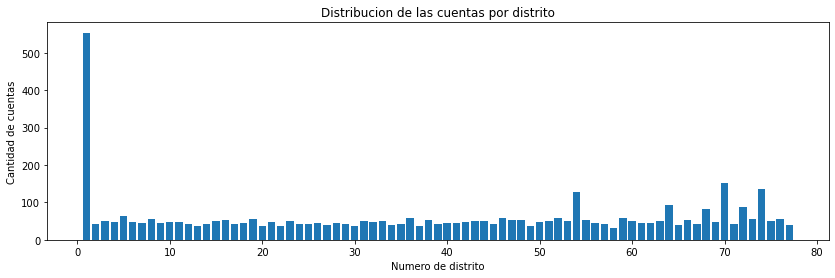

In [6]:
# Grafica barras, distribucion de cuentas por distrito
n_acc_by_distr=df_acc.district_id.value_counts()

fig, ax = plt.subplots(figsize=(14,4))
ax.bar(n_acc_by_distr.index, n_acc_by_distr)
ax.set_title('Distribucion de las cuentas por distrito')
ax.set_ylabel('Cantidad de cuentas')
ax.set_xlabel('Numero de distrito')

# La distribucion de cuentas se encuentra totalmente desproporcionada, estando la mayoria de ellas en praga. 
# Agragar grafico de porcentajes o tabla 

## Tabla CLIENTS
    CLIENTS, Clientes: cada registro describe las caracteristicas de un cliente.
        Columna "client_id": Identificación de la cuenta - 5369 unicos
        Columna "birth_number": Fecha de nacimiento - 4738 unicos
        Columna "district_id": Frecuencia de emisión de estados de cuenta - 77 unicos
        Columna "sex": Genero - 2

In [7]:
df_client = pd.read_csv('cleaned_client.csv', sep = ',')
df_client.head()

,client_id,district_id,sex,age,age_group
0,1,18,F,28,20
1,2,1,M,53,50
2,3,1,F,58,50
3,4,5,M,43,40
4,5,5,F,38,30


In [8]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   client_id    5369 non-null   int64 
 1   district_id  5369 non-null   int64 
 2   sex          5369 non-null   object
 3   age          5369 non-null   int64 
 4   age_group    5369 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 209.9+ KB


In [9]:
df_client.nunique()

client_id      5369
district_id      77
sex               2
age              77
age_group         8
dtype: int64

In [10]:
df_client.isnull().sum()

client_id      0
district_id    0
sex            0
age            0
age_group      0
dtype: int64

Text(0.5, 0, 'Sexo')

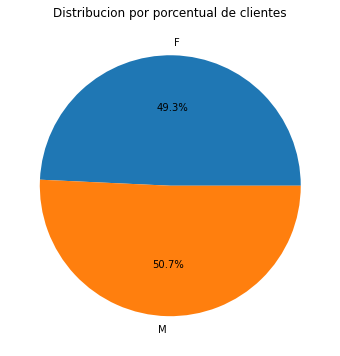

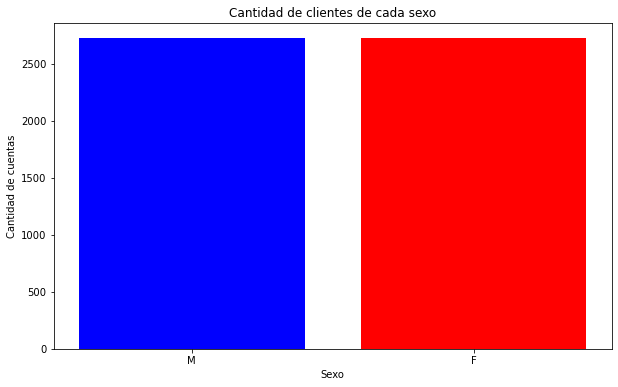

In [11]:
# Distribucion de la cuentas por genero 
grup_by_sex = df_client.groupby(["sex"]).count().reset_index()

fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(grup_by_sex.client_id, labels = grup_by_sex.sex,autopct='%1.1f%%')
ax.set_title('Distribucion por porcentual de clientes')

fig2, ax2 = plt.subplots(figsize = (10,6))
ax2.bar(grup_by_sex.sex[grup_by_sex["sex"] == "M"], grup_by_sex.client_id, color = "b")
ax2.bar(grup_by_sex.sex[grup_by_sex["sex"] == "F"], grup_by_sex.client_id, color = "r")
ax2.set_title('Cantidad de clientes de cada sexo')
ax2.set_ylabel('Cantidad de cuentas')
ax2.set_xlabel('Sexo')

# La distribucion de cuentas entre generos no parece muy diferente

## Tabla DISPOSITON
    DISPOSITON (DISP), Disposición (Disp): cada registro relaciona un cliente con una sola cuenta, es decir, esta relación
    describe los derechos de los clientes para operar cuentas.
       Columna "disp_id": Identificación de registro - 5369 unicos
       Columna "client_id": Identificación de cliente - 5369 unicos
       Columna "account_id": Identificador de cuenta - 4500 unicos
       Columna "type": Tipo de disposicion, Dueno / Usuario - 2 unicos

In [12]:
df_disp = pd.read_csv('disp.csv', sep = ';')
df_disp.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [13]:
df_disp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   int64 
 1   client_id   5369 non-null   int64 
 2   account_id  5369 non-null   int64 
 3   type        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


In [14]:
df_disp.nunique()

disp_id       5369
client_id     5369
account_id    4500
type             2
dtype: int64

In [15]:
df_disp.isnull().sum()

disp_id       0
client_id     0
account_id    0
type          0
dtype: int64

## Tabla  PERMANENT ORDERS
    PERMANENT ORDERS, Debits only (ORDER), Pedidos Permanentes, solo debitos (PEDIDOS): cada registro describe las
    caracteristicas de una orden de pago.
        Columna "order_id": Identificación de registro - 6471 unicos
        Columna "account_id": Identificacion de orden de cuenta emitida para - 3758 unicos
        Columna "bank_to": Banco destinatario - 13 unicos
        Columna "account_to": Cuenta del destinatario - 6646 unicos
        Columna "amount": Importe del pedido - 4412 unicos
        Columna "k_symbol": Caracterizacion del pago - 5. 

In [16]:
df_order = pd.read_csv('cleaned_order.csv', sep = ',')
df_order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,Household
1,29402,2,ST,89597016,3372.7,Loan payment
2,29403,2,QR,13943797,7266.0,Household
3,29404,3,WX,83084338,1135.0,Household
4,29405,3,CD,24485939,327.0,NaN


In [17]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    6471 non-null   int64  
 1   account_id  6471 non-null   int64  
 2   bank_to     6471 non-null   object 
 3   account_to  6471 non-null   int64  
 4   amount      6471 non-null   float64
 5   k_symbol    5092 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 303.5+ KB


In [18]:
df_order.nunique()

order_id      6471
account_id    3758
bank_to         13
account_to    6446
amount        4412
k_symbol         4
dtype: int64

In [19]:
df_order.isnull().sum()

order_id         0
account_id       0
bank_to          0
account_to       0
amount           0
k_symbol      1379
dtype: int64

Text(0.5, 0, 'Banco destinatario')

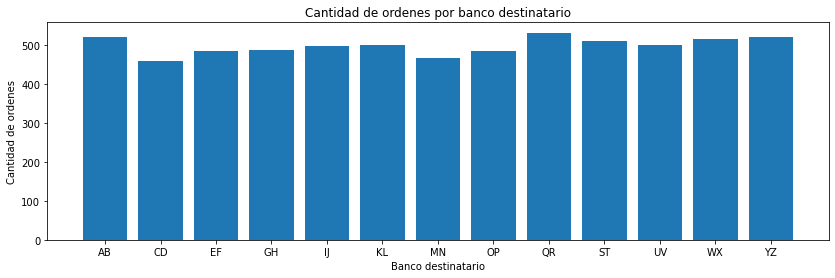

In [20]:
# Distribucion de los bancos destinatarios de ordenes
group_bank_to = pd.DataFrame(df_order.groupby(['bank_to'])["account_to"].count())

fig, ax = plt.subplots(figsize=(14,4))
ax.bar(group_bank_to["account_to"].index, group_bank_to["account_to"])
ax.set_title('Cantidad de ordenes por banco destinatario')
ax.set_ylabel('Cantidad de ordenes')
ax.set_xlabel('Banco destinatario')

# Se observa que la cantidad de operaciones por banco destinatario fue homogenea 

Text(0.5, 0, 'Monto de ordenes')

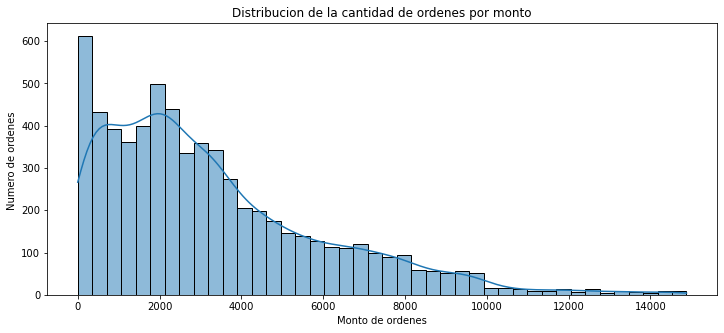

In [21]:
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(data=df_order, x="amount", kde=True)
ax.set_title('Distribucion de la cantidad de ordenes por monto')
ax.set_ylabel('Numero de ordenes ')
ax.set_xlabel('Monto de ordenes')

# El grafico muestra que la mayoria de las ordenes se encuentran entre los 0 y los 4 mil dolares o pesos o lo qeu sea


In [22]:
# Descripcion de los pagos
df_order["amount"].describe()

count     6471.000000
mean      3280.635698
std       2714.475335
min          1.000000
25%       1241.500000
50%       2596.000000
75%       4613.500000
max      14882.000000
Name: amount, dtype: float64

Text(0.5, 0, 'Banco destinatario')

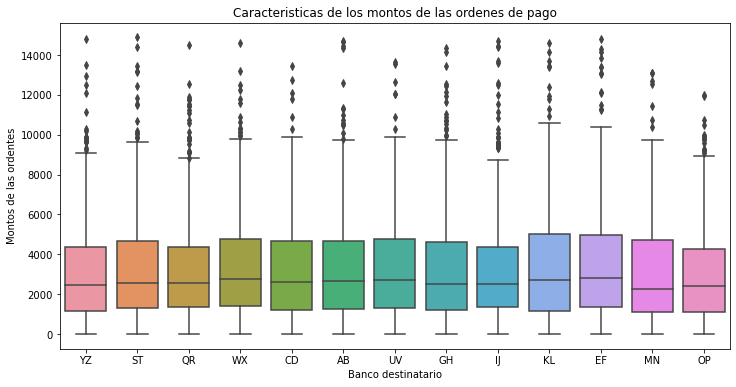

In [23]:
# Caracteristica de los montos de las ordenes a cada banco destinatario
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.boxplot(x ="bank_to", y= "amount",data=df_order)
ax.set_title('Caracteristicas de los montos de las ordenes de pago')
ax.set_ylabel('Montos de las ordentes')
ax.set_xlabel('Banco destinatario')

## Tabla TRANSACTIONS
     TRANSACTIONS (TRANS), Transacciones (Trans) cada registro describe una transacción de una cuenta. 
        Columna "trans_id": Identificación de transaccion - 1056320 unicos
        Columna "account_id": Identificacion de la la cuenta con la que se realizo la transaccion - 4500 unicos
        Columna "date": Fecha de la transaccion - 2191 unicos
        Columna "type": +/- transaccion - 3 unicos
        Columna "operation": Modo de trasaccion - 5 unicos
        Columna "amount": Monto de la transaccion - 40400  
        Columna "balance": Balance de la cuenta despues de la transaccion - 542739
        Columna "k_symbol": Caracteristicas de la transaccion - 8
        Columna "bank": Banco del socio - 13
        Columna "account": Cuenta del socio -7665

In [24]:
df_trans = pd.read_csv('cleaned_trans.csv', sep = ',', low_memory = False)
df_trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,1993-01-01,Credit,Credit in cash,700.0,700.0,NaN,NaN,NaN
1,171812,576,1993-01-01,Credit,Credit in cash,900.0,900.0,NaN,NaN,NaN
2,207264,704,1993-01-01,Credit,Credit in cash,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,1993-01-01,Credit,Credit in cash,600.0,600.0,NaN,NaN,NaN
4,579373,1972,1993-01-02,Credit,Credit in cash,400.0,400.0,NaN,NaN,NaN


In [25]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  object 
 3   type        1039654 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  float64
 6   balance     1056320 non-null  float64
 7   k_symbol    521006 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 80.6+ MB


In [26]:
df_trans.nunique()

trans_id      1056320
account_id       4500
date             2191
type                2
operation           5
amount          40400
balance        542739
k_symbol            7
bank               13
account          7665
dtype: int64

In [27]:
df_trans.isnull().sum()

trans_id           0
account_id         0
date               0
type           16666
operation     183114
amount             0
balance            0
k_symbol      535314
bank          782812
account       760931
dtype: int64

In [28]:
df_trans.pivot_table(index=['operation'], columns='type',values = 'amount', aggfunc="count")

type,Credit,Withdrawal
operation,,
Collection from another bank,65226.0,NaN
Credit card withdrawal,NaN,8036.0
Credit in cash,156743.0,NaN
Remittance to another bank,NaN,208283.0
Withdrawal in Cash,NaN,418252.0


In [29]:
type_trans = pd.DataFrame(df_trans.groupby(['type'])['type'].count())
type_trans

,type
type,
Credit,405083
Withdrawal,634571


Text(0.5, 0, 'Tipo de transaccion')

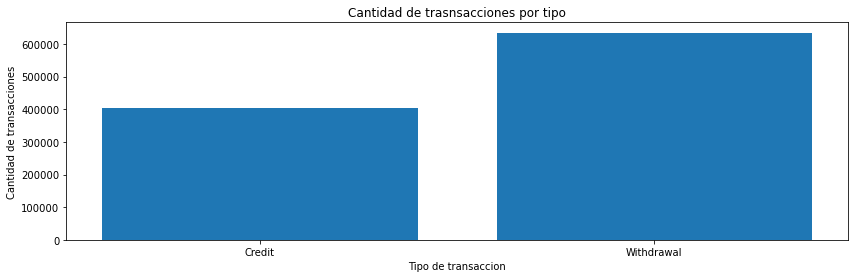

In [30]:
# Distribucion del tipo de transaccion
type_trans = pd.DataFrame(df_trans.groupby(['type'])['type'].count())

fig, ax = plt.subplots(figsize=(14,4))
ax.bar(type_trans["type"].index, type_trans["type"])
ax.set_title('Cantidad de trasnsacciones por tipo')
ax.set_ylabel('Cantidad de transacciones')
ax.set_xlabel('Tipo de transaccion')


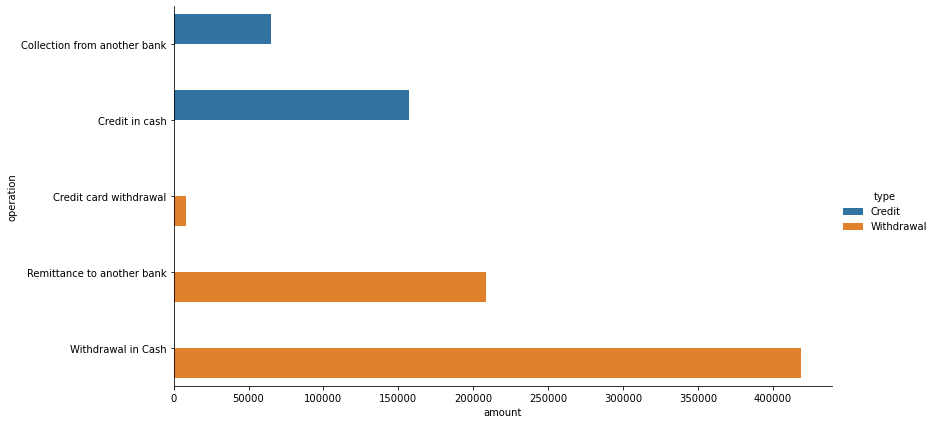

In [31]:
# Caracterisitas d elas operaciones en base a los tipo
Grup_type_operation = pd.DataFrame(df_trans.groupby(["type","operation"]).count().reset_index())
g = sns.catplot(x="amount", y="operation",
                hue="type",
                data=Grup_type_operation, kind="bar",
                 height=6, aspect=2);
# No tengo muy claro pero type es el tipo de transaccion, y en el caso de CREDIT, SE VE QUE LAS OPERACIONES FUERON 
# COLLECTION FROM ANOTHER BANK, que supongo es dinero que se tomo llegando desde otro banco, ......

## Tabla LOANS
     LOANS, Prestamos: Cada registro describe un prestamo concedido para una cuenta determinada.
        Columna "loan_id": Identificador de registro - 682 unicos
        Columna "account_id": Identificador de cuenta - 682 unicos
        Columna "date": Fecha de concesion del prestamo - 559 unicos
        Columna "amount": Importe de prestamo - 645 unicos
        Columna "duration": duracion del prestamo - 5 unicos
        Columna "payments": pagos mensuales del prestamo - 577 unicos  
        Columna "status": estado de la amortizacion del prestamo - 4 unicos
                            A: contrato terminado, sin problema
                            B: contrato terminado, prestamo no pagado
                            C: contrato en ejecucion, ok hasta ahora
                            D: contrato en ejecucion, cliente en deudado


In [32]:
df_loan = pd.read_csv('cleaned_loan.csv', sep = ',')
df_loan.sort_values(by = "account_id")

,loan_id,account_id,date,amount,duration,payments,status
20,4959,2,1994-01-05,80952,24,3373.0,A
239,4961,19,1996-04-29,30276,12,2523.0,B
505,4962,25,1997-12-08,30276,12,2523.0,A
663,4967,37,1998-10-14,318480,60,5308.0,D
582,4968,38,1998-04-19,110736,48,2307.0,C
...,...,...,...,...,...,...,...
654,7294,11327,1998-09-27,39168,24,1632.0,C
632,7295,11328,1998-07-18,280440,60,4674.0,C
189,7304,11349,1995-10-29,419880,60,6998.0,C
271,7305,11359,1996-08-06,54024,12,4502.0,A


In [33]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loan_id     682 non-null    int64  
 1   account_id  682 non-null    int64  
 2   date        682 non-null    object 
 3   amount      682 non-null    int64  
 4   duration    682 non-null    int64  
 5   payments    682 non-null    float64
 6   status      682 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 37.4+ KB


In [34]:
df_loan.nunique()

loan_id       682
account_id    682
date          559
amount        645
duration        5
payments      577
status          4
dtype: int64

In [35]:
df_loan.isnull().sum()

loan_id       0
account_id    0
date          0
amount        0
duration      0
payments      0
status        0
dtype: int64

--DISTRIBUCION DE LOS TIPOS DE PRESTAMOS SEGUN DURACIO EN MESES--
 
12: prestamos con duracion de 12 meses
24: prestamos con duracion de 24 meses
36: prestamos con duracion de 36 meses
48: prestamos con duracion de 48 meses
60: prestamos con duracion de 60 meses
------------Distribucion----------
Total:  682
duration   12   24   36   48   60
duration  131  138  130  138  145

SE OBSERVA QUE DEL TOTAL DE LOS PRESTAMOS OTORGADOS, LA MAYOR PARTE DE ELLOS CORRESPONDE A LA DURACION DE 60 MESES (21.3%)


<Figure size 1008x360 with 0 Axes>

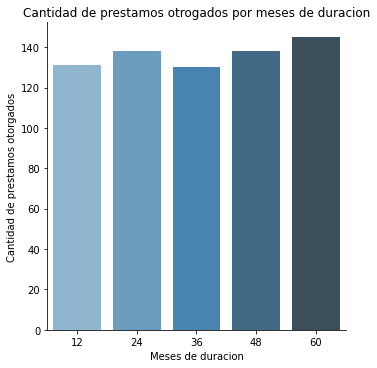

In [36]:
print('--DISTRIBUCION DE LOS TIPOS DE PRESTAMOS SEGUN DURACIO EN MESES--')
print(' ')
print('12: prestamos con duracion de 12 meses')
print('24: prestamos con duracion de 24 meses')
print('36: prestamos con duracion de 36 meses')
print('48: prestamos con duracion de 48 meses')
print('60: prestamos con duracion de 60 meses')
print('------------Distribucion----------')
print("Total: ",df_loan['loan_id'].count())
duration_loan = pd.DataFrame(df_loan.groupby(['duration'])['duration'].count())
print(duration_loan.T)
print('')
print("SE OBSERVA QUE DEL TOTAL DE LOS PRESTAMOS OTORGADOS, LA MAYOR PARTE DE ELLOS CORRESPONDE A LA DURACION DE 60 MESES (21.3%)")



df_loan['duration']=df_loan['duration'].astype(str)
plt.figure(figsize = (14,5))
ax=sns.catplot(x="duration", kind="count", data=df_loan,order=['12', '24', '36', '48','60'], palette="Blues_d")

plt.xlabel('Meses de duracion')
plt.ylabel('Cantidad de prestamos otorgados')
plt.title('Cantidad de prestamos otrogados por meses de duracion')

plt.show()
# Tuve problemas para agregar labels

--PROMEDIO DE LOS PRESTAMOS SEGUN DURACIO EN MESES--
 
12: prestamos con duracion de 12 meses
24: prestamos con duracion de 24 meses
36: prestamos con duracion de 36 meses
48: prestamos con duracion de 48 meses
60: prestamos con duracion de 60 meses
------------caracteristicas----------
          duration  porc  mean_amount
duration                             
12             131  19.2      53635.5
24             138  20.2      99217.9
36             130  19.1     144048.2
48             138  20.2     205592.7
60             145  21.3     244450.8

SE OBSERVA QUE DE LOS PRESTAMOS OTORGADOS POR EL BANCO, AQUELLOS CON MAYOR DURACION SON LOS QUE RECIBIERON MONTOS PROMEDIOS MAS ALTOS


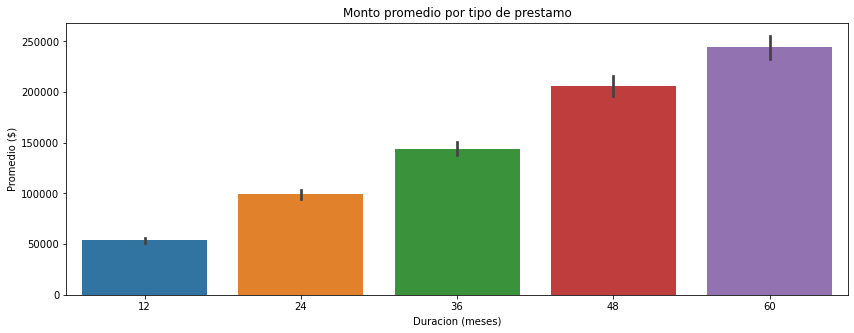

In [37]:
print('--PROMEDIO DE LOS PRESTAMOS SEGUN DURACIO EN MESES--')
print(' ')
print('12: prestamos con duracion de 12 meses')
print('24: prestamos con duracion de 24 meses')
print('36: prestamos con duracion de 36 meses')
print('48: prestamos con duracion de 48 meses')
print('60: prestamos con duracion de 60 meses')
print('------------caracteristicas----------')

duration_loan = pd.DataFrame(df_loan.groupby(['duration'])['duration'].count())
duration_loan
duration_loan['porc'] = round((duration_loan/duration_loan.sum())*100,1)
duration_loan['mean_amount'] = round(pd.DataFrame(df_loan.groupby(['duration'])['amount'].mean()),1)

print(duration_loan)
print('')
print('SE OBSERVA QUE DE LOS PRESTAMOS OTORGADOS POR EL BANCO, AQUELLOS CON MAYOR DURACION SON LOS QUE RECIBIERON MONTOS PROMEDIOS MAS ALTOS')
plt.figure(figsize = (14,5))
x = sns.barplot(x="duration", y='amount', data=df_loan,order=['12', '24', '36', '48','60'], ci=68)
plt.xlabel('Duracion (meses)')
plt.ylabel('Promedio ($)')
plt.title('Monto promedio por tipo de prestamo')

plt.show()


--PRESTAMOS SEGUN DURACIO EN MESES--
 
12: prestamos con duracion de 12 meses
24: prestamos con duracion de 24 meses
36: prestamos con duracion de 36 meses
48: prestamos con duracion de 48 meses
60: prestamos con duracion de 60 meses
------------caracteristicas----------
          duration  porc  mean_amount  median_amount  max_amount  min_amount  \
duration                                                                       
12             131  19.2      53635.5        45768.0      116832        4980   
24             138  20.2      99217.9        92280.0      209040        7656   
36             130  19.1     144048.2       142812.0      300204       10944   
48             138  20.2     205592.7       190440.0      475680       16032   
60             145  21.3     244450.8       240900.0      590820       18720   

          std_amount  
duration              
12           27844.3  
24           49699.3  
36           74849.3  
48          115774.8  
60          130683.1  

A PES

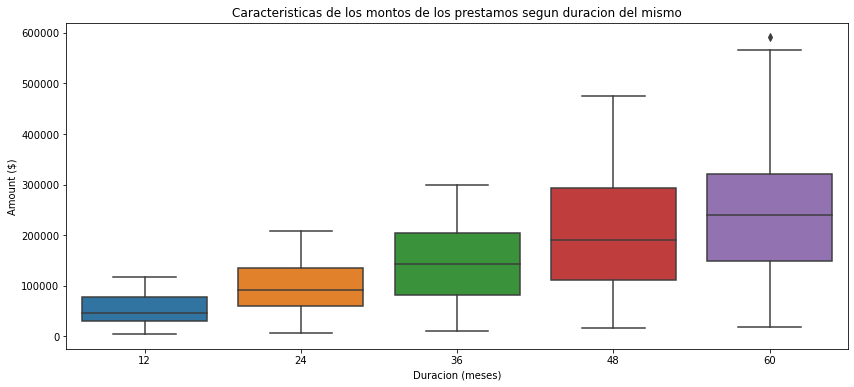

In [38]:
print('--PRESTAMOS SEGUN DURACIO EN MESES--')
print(' ')
print('12: prestamos con duracion de 12 meses')
print('24: prestamos con duracion de 24 meses')
print('36: prestamos con duracion de 36 meses')
print('48: prestamos con duracion de 48 meses')
print('60: prestamos con duracion de 60 meses')
print('------------caracteristicas----------')

duration_loan = pd.DataFrame(df_loan.groupby(['duration'])['duration'].count())
duration_loan
duration_loan['porc'] = round((duration_loan/duration_loan.sum())*100,1)
duration_loan['mean_amount'] = round(pd.DataFrame(df_loan.groupby(['duration'])['amount'].mean()),1)
duration_loan['median_amount'] = round(pd.DataFrame(df_loan.groupby(['duration'])['amount'].median()),1)
duration_loan['max_amount'] = round(pd.DataFrame(df_loan.groupby(['duration'])['amount'].max()),1)
duration_loan['min_amount'] = round(pd.DataFrame(df_loan.groupby(['duration'])['amount'].min()),1)
duration_loan['std_amount'] = round(pd.DataFrame(df_loan.groupby(['duration'])['amount'].std()),1)

print(duration_loan)


fig, ax = plt.subplots(figsize=(14,6))
ax = sns.boxplot(x ="duration", y= "amount",data=df_loan, order=[ 
                 '12', '24', '36', '48','60'])
plt.xlabel('Duracion (meses)')
plt.ylabel('Amount ($)')
plt.title('Caracteristicas de los montos de los prestamos segun duracion del mismo')
print('')
print('A PESAR QUE EL GRAFICO PREVIO MOSTRO QUE LOS PROMEDIOS DE LOS MONTOS POR PRESTAMOS TENIA UNA CARACTERISTICA ASCENDENTE DONDE LOS QUE MENOS DURACION TENIAN, ERAN LOS QUE TENIA MONTOS PROMEDIO MAS BAJOS. EN ESTE GRAFICO SE CONFIRMA ESA CARACTERISTICA,PERO SE VE QUE EL RANGO DENTRO DE CADA GRUPO ES AMPLIO Y SE MAGNIFICA A MEDIDA QUE EL PRESTAMO ES DE MAYOR DURACION DE MESES')
print('')
print('SE OBSERVA TAMBIEN UNA DISTRIBUCION PRACTICAMENTE NORMAL EN TODOS LOS CASOS, EXCEPTO EN LOS DE 12 MESES DONDE CLARAMENTE LA MEDIA ESTA MAS PROXIMA A LOS VALORES MAS BAJAOS DE LOS MONTOS SOLICITADOS.')

------------STATUS DE LOS PRESTAMOS------------

A: contrato terminado, sin problema
B: contrato terminado, prestamo no pagado
C: contrato en ejecucion, ok hasta ahora
D: contrato en ejecucion, cliente en deudado
status    A   B    C   D
status  203  31  403  45

DE LOS 682 PRSTAMOS OTORGADOS POR EL BANCO SE OBSERVA QUE EL 606 (88.9%) SE ENCUENTRA EN SITUACION NORMAL DE PAGO, MIENTRAS QUE EL QUE 76 (11,1%) DE ELLOS SE ENCUENTRA CON ALUGN TIPO DE PROBLEMA DE PAGO 


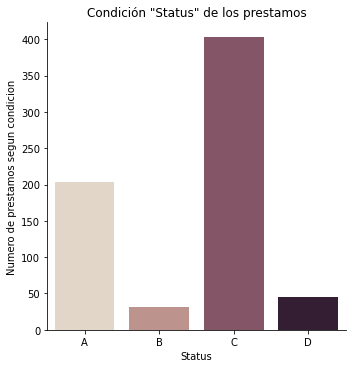

In [39]:
print('------------STATUS DE LOS PRESTAMOS------------')
print('')
print('A: contrato terminado, sin problema')

print('B: contrato terminado, prestamo no pagado')
print('C: contrato en ejecucion, ok hasta ahora')
print('D: contrato en ejecucion, cliente en deudado')

status_loan = pd.DataFrame(df_loan.groupby(['status'])['status'].count())
print(status_loan.T)
print('')
print("DE LOS 682 PRSTAMOS OTORGADOS POR EL BANCO SE OBSERVA QUE EL 606 (88.9%) SE ENCUENTRA EN SITUACION NORMAL DE PAGO, MIENTRAS QUE EL QUE 76 (11,1%) DE ELLOS SE ENCUENTRA CON ALUGN TIPO DE PROBLEMA DE PAGO ")
sns.catplot(x="status", kind="count", palette="ch:.25", data=df_loan, order=['A','B','C','D'])
plt.xlabel('Status')
plt.ylabel('Numero de prestamos segun condicion')
plt.title('Condición "Status" de los prestamos')

plt.show()



------------PRESTAMOS SEGUN STATUS------------

A: contrato terminado, sin problema
B: contrato terminado, prestamo no pagado
C: contrato en ejecucion, ok hasta ahora
D: contrato en ejecucion, cliente en deudado
------------caracteristicas----------
        status  porc  mean_amount  median_amount  std_amount
status                                                      
A          203  29.8      91641.5        79632.0     64705.1
B           31   4.5     140720.9        96396.0     99635.8
C          403  59.1     171410.4       153504.0    117113.9
D           45   6.6     249284.5       260400.0    132704.8

EL GRAFICO MUESTA QUE EL MONTO PROMEDIO DE LOS PRESTAMOS EN LA CATEGORIA 'D' ES EL MAS ALTO. Y EN CASO QUE SE JUNTARAN LAS ACTEGORIAS A/C Y B/D, EL MONTO PROMEDIO DE AQUELLOS CREDITOS CON PROBLEMAS SERIA MAS ALTO


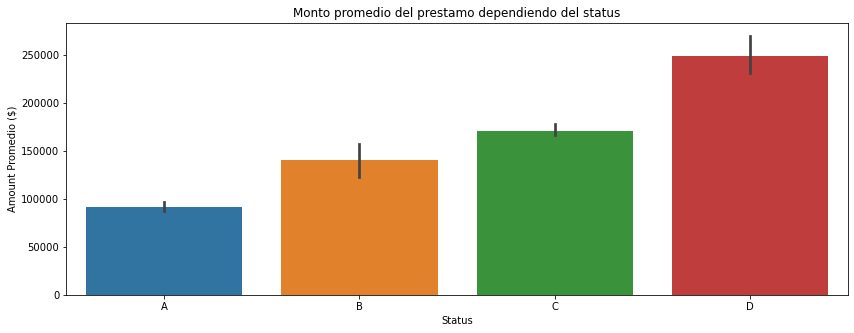

In [40]:
print('------------PRESTAMOS SEGUN STATUS------------')
print('')
print('A: contrato terminado, sin problema')

print('B: contrato terminado, prestamo no pagado')
print('C: contrato en ejecucion, ok hasta ahora')
print('D: contrato en ejecucion, cliente en deudado')

print('------------caracteristicas----------')

status_loan = pd.DataFrame(df_loan.groupby(['status'])['status'].count())
status_loan
status_loan['porc'] = round((status_loan/status_loan.sum())*100,1)
status_loan['mean_amount'] = round(pd.DataFrame(df_loan.groupby(['status'])['amount'].mean()),1)
status_loan['median_amount'] = round(pd.DataFrame(df_loan.groupby(['status'])['amount'].median()),0)
status_loan['std_amount'] = round(pd.DataFrame(df_loan.groupby(['status'])['amount'].std()),1)

status_loan
print(status_loan)

plt.figure(figsize = (14,5))
x = sns.barplot(x="status", y='amount', data=df_loan,order=['A', 'B', 'C', 'D'], ci=68)
plt.xlabel('Status')
plt.ylabel('Amount Promedio ($)')
plt.title('Monto promedio del prestamo dependiendo del status')



print('')
print("EL GRAFICO MUESTA QUE EL MONTO PROMEDIO DE LOS PRESTAMOS EN LA CATEGORIA 'D' ES EL MAS ALTO. Y EN CASO QUE SE JUNTARAN LAS ACTEGORIAS A/C Y B/D, EL MONTO PROMEDIO DE AQUELLOS CREDITOS CON PROBLEMAS SERIA MAS ALTO")

------------PRESTAMOS SEGUN STATUS------------

A: contrato terminado, sin problema
B: contrato terminado, prestamo no pagado
C: contrato en ejecucion, ok hasta ahora
D: contrato en ejecucion, cliente en deudado
------------caracteristicas----------
        status  porc  mean_amount  median_amount  max_amount  min_amount  \
status                                                                     
A          203  29.8      91641.5        79632.0      323472        4980   
B           31   4.5     140720.9        96396.0      464520       29448   
C          403  59.1     171410.4       153504.0      590820        5148   
D           45   6.6     249284.5       260400.0      541200       36204   

        std_amount  
status              
A          64705.1  
B          99635.8  
C         117113.9  
D         132704.8  

ESTE GRAFICO CONFIRMA LO VISTO PREVIAMENTE, LA CATEGORIA 'D' DE STATUS, TIENE LA MEDIANA MAS ALTOS QUE EL RESTO, SOPORTANDO LA IDEA QUE LOS CREDITOS QUE CAEN EN IMPAG

Text(0.5, 1.0, 'Caracteristicas de los montos de los prestamos segun Status')

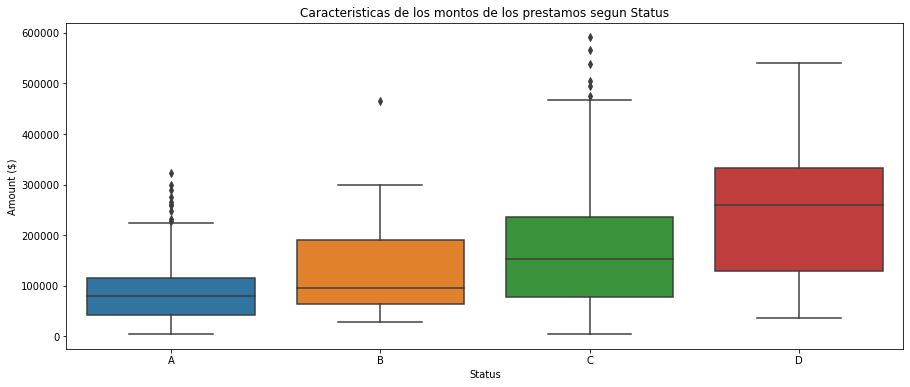

In [41]:
print('------------PRESTAMOS SEGUN STATUS------------')
print('')
print('A: contrato terminado, sin problema')
print('B: contrato terminado, prestamo no pagado')
print('C: contrato en ejecucion, ok hasta ahora')
print('D: contrato en ejecucion, cliente en deudado')

print('------------caracteristicas----------')
status_loan = pd.DataFrame(df_loan.groupby(['status'])['status'].count())
status_loan
status_loan['porc'] = round((status_loan/status_loan.sum())*100,1)
status_loan['mean_amount'] = round(pd.DataFrame(df_loan.groupby(['status'])['amount'].mean()),1)
status_loan['median_amount'] = round(pd.DataFrame(df_loan.groupby(['status'])['amount'].median()),0)
status_loan['max_amount'] = round(pd.DataFrame(df_loan.groupby(['status'])['amount'].max()),1)
status_loan['min_amount'] = round(pd.DataFrame(df_loan.groupby(['status'])['amount'].min()),1)
status_loan['std_amount'] = round(pd.DataFrame(df_loan.groupby(['status'])['amount'].std()),1)
print(status_loan)
print('')
print("ESTE GRAFICO CONFIRMA LO VISTO PREVIAMENTE, LA CATEGORIA 'D' DE STATUS, TIENE LA MEDIANA MAS ALTOS QUE EL RESTO, SOPORTANDO LA IDEA QUE LOS CREDITOS QUE CAEN EN IMPAGOS, SON AQUELLOS QUE LOS MONTOS SOLOCITADOS SON MAS ALTOS")

fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x ="status", y= "amount",data=df_loan, order=[ 
                 'A', 'B', 'C', 'D'])
plt.xlabel('Status')
plt.ylabel('Amount ($)')
plt.title('Caracteristicas de los montos de los prestamos segun Status')

------------NUMERO DE PRESTAMOS SEGUN DURACION Y STATUS------------

status     A   B    C   D    %A    %B    %C    %D
duration                                         
12        93  10   27   1  45.8  32.3   6.7   2.2
24        64  11   57   6  31.5  35.5  14.1  13.3
36        32   7   83   8  15.8  22.6  20.6  17.8
48        11   2  111  14   5.4   6.5  27.5  31.1
60         3   1  125  16   1.5   3.2  31.0  35.6

AL RELACIONAR LAS VARIABLES DURACION DE PRESTAMO Y STATUS CREDITICIO, SE CONFIRMA QUE A MEDIDA QUE LA DURACION DE LOS PRESTAMOS AUMENTA, EL NUMERO DE CASOS DE MORA TAMBIEN LOS HACE


<Figure size 864x360 with 0 Axes>

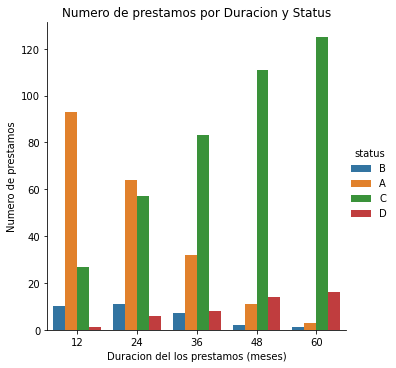

In [42]:
print('------------NUMERO DE PRESTAMOS SEGUN DURACION Y STATUS------------')
print('')

duration_loans = pd.DataFrame(df_loan.groupby(['duration','status','loan_id'])['loan_id'].count())
status_pivot = duration_loans.pivot_table(index='duration',columns='status',values='loan_id',aggfunc='count')
status_pivot1=status_pivot
status_pivot1['%A'] = round((status_pivot1['A']/status_pivot1['A'].sum())*100,1)
status_pivot1['%B'] = round((status_pivot1['B']/status_pivot1['B'].sum())*100,1)
status_pivot1['%C'] = round((status_pivot1['C']/status_pivot1['C'].sum())*100,1)
status_pivot1['%D'] = round((status_pivot1['D']/status_pivot1['D'].sum())*100,1)
status_pivot_abs_porc = status_pivot1
status_pivot_abs_porc
print(status_pivot_abs_porc)
print('')
print('AL RELACIONAR LAS VARIABLES DURACION DE PRESTAMO Y STATUS CREDITICIO, SE CONFIRMA QUE A MEDIDA QUE LA DURACION DE LOS PRESTAMOS AUMENTA, EL NUMERO DE CASOS DE MORA TAMBIEN LOS HACE')


plt.figure(figsize = (12,5))
sns.catplot(x="duration", kind="count", hue="status", data=df_loan,order=['12', '24', '36', '48','60'])
plt.xlabel('Duracion del los prestamos (meses)')
plt.ylabel('Numero de prestamos')
plt.title('Numero de prestamos por Duracion y Status')

plt.show()


------------NUMERO DE PRESTAMOS SEGUN DURACION Y STATUS------------

status     A   B    C   D    %A    %B    %C    %D
duration                                         
12        93  10   27   1  45.8  32.3   6.7   2.2
24        64  11   57   6  31.5  35.5  14.1  13.3
36        32   7   83   8  15.8  22.6  20.6  17.8
48        11   2  111  14   5.4   6.5  27.5  31.1
60         3   1  125  16   1.5   3.2  31.0  35.6

AL RELACIONAR LAS VARIABLES DURACION DE PRESTAMO Y STATUS CREDITICIO, SE OBSERVA QUE LOS PRESTAMOS DE STATUS B, TIENEN UNA MEDIA DE MONTO MAS ALTO QUE EL RESTO DE LOS STATUS EN AQUELLOS CREDITOS DE 24 Y 36 MESES. EN EL CASO DE LOS 36 MESES EL STATUS QUE SIGUE AL B CON MEDIA MAS ALTA ES EL D.

A MEDIDA QUE LA DURACION SIGUE AUMENTANDO, SE OBSERVA QUE LOS PRESTAMOS CON STATUS D TIENE UNA MEDIA MAYOR QUE EL RESTO.

LUEGO DE REALIZAR ESTE PRIMER ANALISIS DE LOS DATOS, PODRIAMOS AFIRMAR QUE LOS CREDITOS QUE CAEN EN MORA SON AQUELLOS DE MAYOR MONTOPROMEDIO Y DURACION.


Text(0.5, 1.0, 'Monto de los prestamos por Duracion y Status')

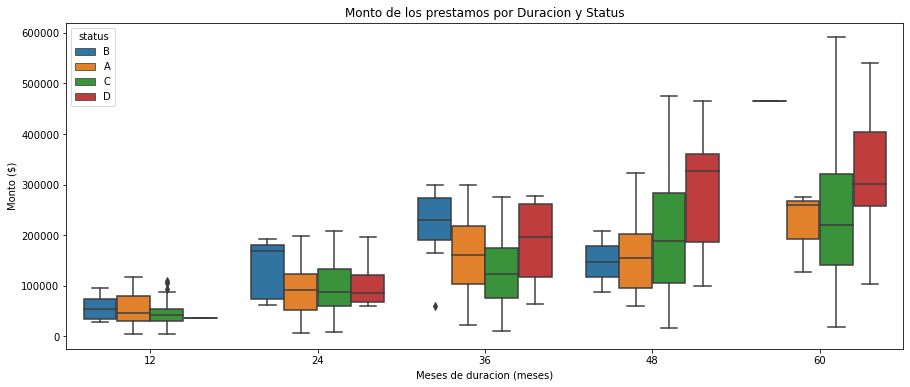

In [43]:
print('------------NUMERO DE PRESTAMOS SEGUN DURACION Y STATUS------------')
print('')


duration_loans = pd.DataFrame(df_loan.groupby(['duration','status','loan_id'])['loan_id'].count())
status_pivot = duration_loans.pivot_table(index='duration',columns='status',values='loan_id',aggfunc='count')
status_pivot1=status_pivot
status_pivot1['%A'] = round((status_pivot1['A']/status_pivot1['A'].sum())*100,1)
status_pivot1['%B'] = round((status_pivot1['B']/status_pivot1['B'].sum())*100,1)
status_pivot1['%C'] = round((status_pivot1['C']/status_pivot1['C'].sum())*100,1)
status_pivot1['%D'] = round((status_pivot1['D']/status_pivot1['D'].sum())*100,1)
status_pivot_abs_porc = status_pivot1
status_pivot_abs_porc
print(status_pivot_abs_porc)
print('')
print('AL RELACIONAR LAS VARIABLES DURACION DE PRESTAMO Y STATUS CREDITICIO, SE OBSERVA QUE LOS PRESTAMOS DE STATUS B, TIENEN UNA MEDIA DE MONTO MAS ALTO QUE EL RESTO DE LOS STATUS EN AQUELLOS CREDITOS DE 24 Y 36 MESES. EN EL CASO DE LOS 36 MESES EL STATUS QUE SIGUE AL B CON MEDIA MAS ALTA ES EL D.')
print('')
print("A MEDIDA QUE LA DURACION SIGUE AUMENTANDO, SE OBSERVA QUE LOS PRESTAMOS CON STATUS D TIENE UNA MEDIA MAYOR QUE EL RESTO.")
print('')
print('LUEGO DE REALIZAR ESTE PRIMER ANALISIS DE LOS DATOS, PODRIAMOS AFIRMAR QUE LOS CREDITOS QUE CAEN EN MORA SON AQUELLOS DE MAYOR MONTOPROMEDIO Y DURACION.')
      

fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x ="duration", y= "amount",data=df_loan,order=[ 
                 '12', '24', '36', '48','60'],hue = 'status')
plt.xlabel('Meses de duracion (meses)')
plt.ylabel('Monto ($)')
plt.title('Monto de los prestamos por Duracion y Status')

Text(0.5, 1.0, 'Montos por status y duracion ')

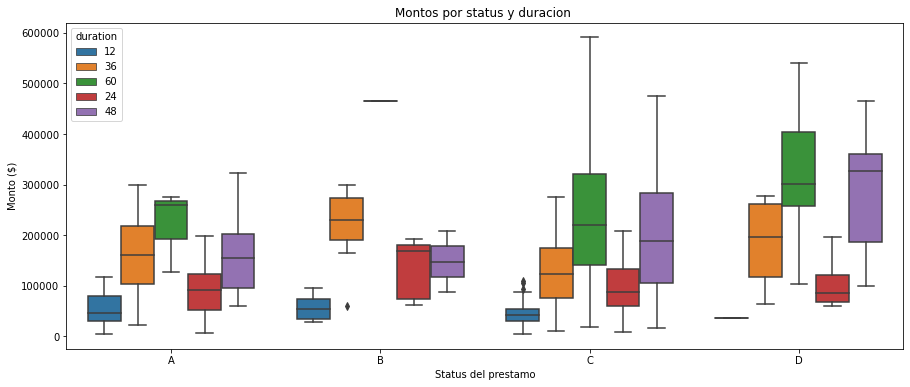

In [44]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x ="status", y= "amount",data=df_loan,order=[ 
                 'A', 'B', 'C', 'D'],hue = 'duration')
plt.xlabel('Status del prestamo')
plt.ylabel('Monto ($)')
plt.title('Montos por status y duracion ')

In [45]:

duration_loan = pd.DataFrame(df_loan.groupby(['duration'])['duration'].count())
duration_loan
duration_loan['porc'] = round((duration_loan/duration_loan.sum())*100,1)
duration_loan['mean_amount'] = round(pd.DataFrame(df_loan.groupby(['duration'])['amount'].mean()),1)
duration_loan['median_amount'] = round(pd.DataFrame(df_loan.groupby(['duration'])['amount'].median()),1)
duration_loan['max_amount'] = round(pd.DataFrame(df_loan.groupby(['duration'])['amount'].max()),1)
duration_loan['min_amount'] = round(pd.DataFrame(df_loan.groupby(['duration'])['amount'].min()),1)
duration_loan['std_amount'] = round(pd.DataFrame(df_loan.groupby(['duration'])['amount'].std()),1)

duration_loan
# La distribucion del total de prestamos es pareja, siendo la mayor los de 60 meses con un 21.2%

,duration,porc,mean_amount,median_amount,max_amount,min_amount,std_amount
duration,,,,,,,
12,131,19.2,53635.5,45768.0,116832,4980,27844.3
24,138,20.2,99217.9,92280.0,209040,7656,49699.3
36,130,19.1,144048.2,142812.0,300204,10944,74849.3
48,138,20.2,205592.7,190440.0,475680,16032,115774.8
60,145,21.3,244450.8,240900.0,590820,18720,130683.1


In [46]:
average_loan_A = round(statistics.mean(list(df_loan.amount[df_loan["status"] == "A"])),2)
average_loan_B = round(statistics.mean(list(df_loan.amount[df_loan["status"] == "B"])),2)
average_loan_C = round(statistics.mean(list(df_loan.amount[df_loan["status"] == "C"])),2)
average_loan_D = round(statistics.mean(list(df_loan.amount[df_loan["status"] == "D"])),2)
print([average_loan_A, average_loan_B, average_loan_C, average_loan_D])

[91641.46, 140720.9, 171410.35, 249284.53]


## Tabla  CREDIT CARDS
    CREDIT CARDS (CARD),Tarjetas de Crédito (Tarjeta): Cada registro describe una tarjeta de crédito emitida a una cuenta. 
       Columna "card_id": Identificado de registro - 892 unicos
       Columna "disp_id": Identificador de disposicion - 892 unicos
       Columna "type": Tipo de tarjeta de credito - 3 unicos
                             junior
                             classic
                             gold
       Columna "issued": Fecha de emision de tarjeta - 607 unicos


In [47]:
df_card = pd.read_csv('cleaned_card.csv', sep = ',')
df_card.head()

,card_id,disp_id,type,issued_date
0,1005,9285,classic,1993-11-07
1,104,588,classic,1994-01-19
2,747,4915,classic,1994-02-05
3,70,439,classic,1994-02-08
4,577,3687,classic,1994-02-15


In [48]:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   card_id      892 non-null    int64 
 1   disp_id      892 non-null    int64 
 2   type         892 non-null    object
 3   issued_date  892 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB


In [49]:
df_card.nunique()

card_id        892
disp_id        892
type             3
issued_date    607
dtype: int64

In [50]:
df_card.isnull().sum()

card_id        0
disp_id        0
type           0
issued_date    0
dtype: int64

## Tabla DEMOGRAPHIC DATA
    DEMOGRAPHIC DATA (DISTRICT), Datos Demográficos (Distrito): Cada registro describe las características demográficas 
    de un distrito.
        Columna "A1": Identificado de distrito - 77 unicos
        Columna "A2": Nombre del distrito - 77 unicos
        Columna "A3": Nombre de la region - 8 unicos
        Columna "A4": Numero de habitantes - 77 unicos
        Columna "A5": Numero de municipios con <499 habitantes - 53 unicos
        Columna "A6": Numero de municipios con 500-1499 habitantes - 36 unicos
        Columna "A7": Numero de municipios con 2000-9999 habitantes - 17 unicos
        Columna "A8": Numero de municipios con >10000 habitantes - 6 unicos
        Columna "A9": Numero de ciudades - 11 unicos
        Columna "A10": Proporcion de habitantes urbanos - 70 unicos
        Columna "A11": Salario medio - 76 unicos
        Columna "A12": Tasa de desempleo 1995 - 71 unicos
        Columna "A13": Tasa de desempleo de 1996 - 73 unicos
        Columna "A14": Emprendedores por cada 1000 habitantes - 44 unicos
        Columna "A15": Numero de delitos cometidos en 1995 - 76 unicos
        Columna "A16": Numero de delitos cometidos en 1996 - 76 unicos

In [51]:
df_district = pd.read_csv('district.csv', sep = ';')
df_district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [52]:
df_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      77 non-null     int64  
 1   A2      77 non-null     object 
 2   A3      77 non-null     object 
 3   A4      77 non-null     int64  
 4   A5      77 non-null     int64  
 5   A6      77 non-null     int64  
 6   A7      77 non-null     int64  
 7   A8      77 non-null     int64  
 8   A9      77 non-null     int64  
 9   A10     77 non-null     float64
 10  A11     77 non-null     int64  
 11  A12     77 non-null     object 
 12  A13     77 non-null     float64
 13  A14     77 non-null     int64  
 14  A15     77 non-null     object 
 15  A16     77 non-null     int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 9.8+ KB


In [53]:
df_trans.nunique()

trans_id      1056320
account_id       4500
date             2191
type                2
operation           5
amount          40400
balance        542739
k_symbol            7
bank               13
account          7665
dtype: int64

In [54]:
df_trans.isnull().sum()

trans_id           0
account_id         0
date               0
type           16666
operation     183114
amount             0
balance            0
k_symbol      535314
bank          782812
account       760931
dtype: int64

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Explorando la tabla de información completa de pagos de préstamos

In [55]:
df_lp = pd.read_csv('Full loan payment table information.csv', sep = ',')
df_lp.head()

,index,client_id,district_id,sex,age,age_group,account_id,type,loan_id,date,...,A7,A8,total_of_cities,A10,avg_salary,A12,A13,A14,A15,A16
0,0,2,1,M,53,50,2.0,OWNER,4959,1994-01-05,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,79,25,21,F,59,50,19.0,OWNER,4961,1996-04-29,...,7,1,7,67.0,9104,1.51,2.07,123,2299,2354
2,87,31,68,M,36,30,25.0,OWNER,4962,1997-12-08,...,18,2,6,57.2,9893,4.09,4.72,96,5623,5887
3,102,45,20,M,46,40,37.0,OWNER,4967,1998-10-14,...,3,1,4,58.4,8547,2.65,3.64,120,1563,1542
4,107,46,19,F,58,50,38.0,OWNER,4968,1998-04-19,...,3,1,4,52.7,8402,3.13,3.98,120,999,1099


In [56]:
df_lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            682 non-null    int64  
 1   client_id        682 non-null    int64  
 2   district_id      682 non-null    int64  
 3   sex              682 non-null    object 
 4   age              682 non-null    int64  
 5   age_group        682 non-null    int64  
 6   account_id       682 non-null    float64
 7   type             682 non-null    object 
 8   loan_id          682 non-null    int64  
 9   date             682 non-null    object 
 10  amount           682 non-null    int64  
 11  duration         682 non-null    int64  
 12  payments         682 non-null    float64
 13  status           682 non-null    object 
 14  trans_amount     682 non-null    float64
 15  balance          682 non-null    float64
 16  district_name    682 non-null    object 
 17  district_area   

In [57]:
df_lp.nunique()

index              682
client_id          682
district_id         77
sex                  2
age                 46
age_group            6
account_id         682
type                 1
loan_id            682
date               559
amount             645
duration             5
payments           577
status               4
trans_amount       666
balance            682
district_name       77
district_area        8
population          77
A5                  53
A6                  36
A7                  17
A8                   6
total_of_cities     11
A10                 70
avg_salary          76
A12                 71
A13                 73
A14                 44
A15                 76
A16                 76
dtype: int64

In [58]:
df_lp.isnull().sum()

index              0
client_id          0
district_id        0
sex                0
age                0
age_group          0
account_id         0
type               0
loan_id            0
date               0
amount             0
duration           0
payments           0
status             0
trans_amount       0
balance            0
district_name      0
district_area      0
population         0
A5                 0
A6                 0
A7                 0
A8                 0
total_of_cities    0
A10                0
avg_salary         0
A12                0
A13                0
A14                0
A15                0
A16                0
dtype: int64

In [59]:
# Dividimos la tabla según los status de cada cliente:
A = df_lp[df_lp['status'] == 'A']
B = df_lp[df_lp['status'] == 'B']
C = df_lp[df_lp['status'] == 'C']
D = df_lp[df_lp['status'] == 'D']

### Sexo por categoría

<AxesSubplot:xlabel='sex', ylabel='Count'>

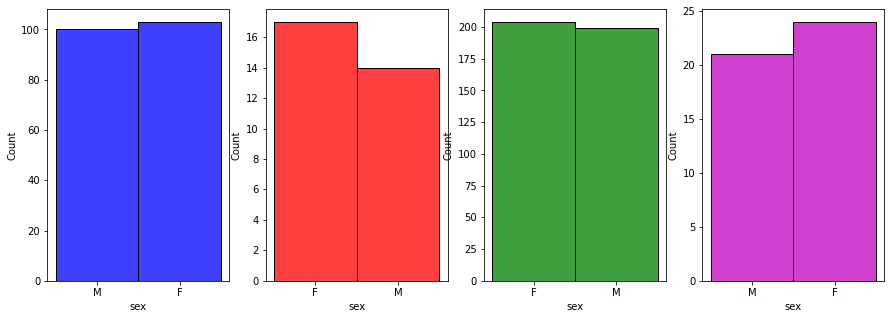

In [60]:
plt.figure(figsize = (15,5))
plt.subplot(1,4,1)
sns.histplot(data = A, x = 'sex', color = 'b', legend = 'A')
plt.subplot(1,4,2)
sns.histplot(data = B, x = 'sex', color ='r')
plt.subplot(1,4,3)
sns.histplot(data = C, x = 'sex', color = 'g')
plt.subplot(1,4,4)
sns.histplot(data = D, x = 'sex', color = 'm')

En esta figura se encuentran las diferentes categorías: A en azul; B en rojo; C en verde; y D en magenta. Aquí podemos observar que la cantidad de hombres y mujeres que lograron pagar sus préstamos con éxito (en azul) no muestran una gran diferencia, al igual como sucede en aquellos que van al día con sus pagos (en verde). Sin embargo, la gráfica de morosos (en rojo) nos muestra un aparente 'gran' contraste, y digo aparente porque la cantidad de clientes que hay de diferencia entre ambos es mínima, apenas de 3 personas, solo que el gráfico al tener una escala menor muestra una diferencia mucho más grande. Lo mismo sucede con los que se quedaron atrás con sus pagos (en magenta).

### Distrito por categoría

<AxesSubplot:xlabel='district_area', ylabel='Count'>

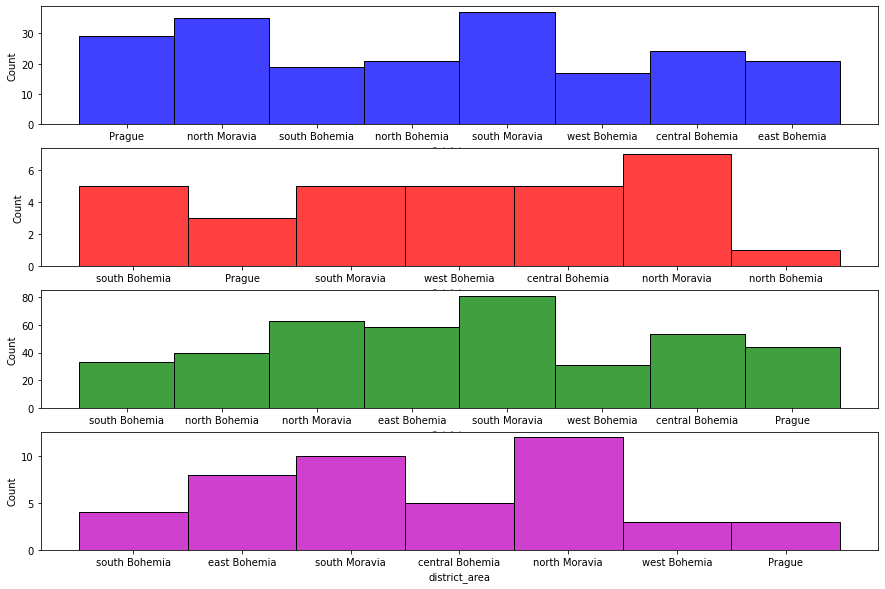

In [61]:
plt.figure(figsize = (15,10))
plt.subplot(4,1,1)
sns.histplot(data = A, x = 'district_area', color = 'b')
plt.subplot(4,1,2)
sns.histplot(data = B, x = 'district_area', color ='r')
plt.subplot(4,1,3)
sns.histplot(data = C, x = 'district_area', color = 'g')
plt.subplot(4,1,4)
sns.histplot(data = D, x = 'district_area', color = 'm')

Con este nuevo gráfico, podemos notar con claridad cual es el área del distrito que más deudores poseen (North Moravia) y aquellos que más pagan con éxito sus préstamos (South Moravia). Ahora vamos a ver el estado de cada distrito de North & South Moravia:

In [62]:
Ad = A[A['district_area'] == 'south Moravia']
Bd = B[B['district_area'] == 'north Moravia']
Cd = C[C['district_area'] == 'south Moravia']
Dd = D[D['district_area'] == 'north Moravia']

<AxesSubplot:xlabel='district_name', ylabel='Count'>

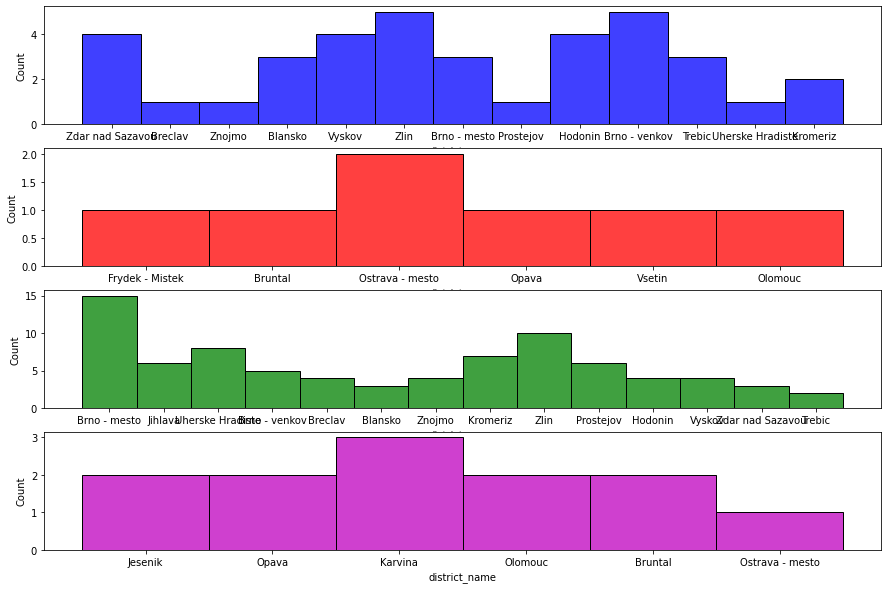

In [63]:
plt.figure(figsize = (15,10))
plt.subplot(4,1,1)
sns.histplot(data = Ad, x = 'district_name', color = 'b')
plt.subplot(4,1,2)
sns.histplot(data = Bd, x = 'district_name', color ='r')
plt.subplot(4,1,3)
sns.histplot(data = Cd, x = 'district_name', color = 'g')
plt.subplot(4,1,4)
sns.histplot(data = Dd, x = 'district_name', color = 'm')

Con esto, podemos aseverar que los mejores pagadores provienen de la ciudad de Brno y Zlin, mientras que aquellos que viven en Ostrava y Karviná, tienen la tendencia en caer a un estado moroso. Ahora... buscaremos datos de cada ciudad:

In [64]:
Ad = Ad[Ad['district_name'] == 'Zlin']
Cd = Cd[Cd['district_name'] == 'Brno - mesto']
Bd = Bd[Bd['district_name'] == 'Ostrava - mesto']
Dd = Dd[Dd['district_name'] == 'Karvina']

In [65]:
print('----Mejor zona de clientes----\n')

print('\nCLIENTES QUE VIVEN EN ZLIN: \nSalario Medio: ' + str(Ad['avg_salary'].iloc[0]))
print('Número de habitantes: ' + str(Ad['population'].iloc[0]))
print('Tasa de desempleo en 1996: ' + str(Ad['A13'].iloc[0]))
print('Delitos cometidos en 1996: ' + str(Ad['A16'].iloc[0]))
print('Emprendedores por cada 1000 habitantes: ' + str(Ad['A14'].iloc[0]))

print('\nCLIENTES QUE VIVEN EN BRNO - MESTO: \nSalario Medio: ' + str(Cd['avg_salary'].iloc[0]))
print('Número de habitantes: ' + str(Cd['population'].iloc[0]))
print('Tasa de desempleo en 1996: ' + str(Cd['A13'].iloc[0]))
print('Delitos cometidos en 1996: ' + str(Cd['A16'].iloc[0]))
print('Emprendedores por cada 1000 habitantes: ' + str(Cd['A14'].iloc[0]))

print('\n----Peor zona de clientes----\n')

print('\nCLIENTES QUE VIVEN EN OSTRAVA - MESTO: \nSalario Medio: ' + str(Bd['avg_salary'].iloc[0]))
print('Número de habitantes: ' + str(Bd['population'].iloc[0]))
print('Tasa de desempleo en 1996: ' + str(Bd['A13'].iloc[0]))
print('Delitos cometidos en 1996: ' + str(Bd['A16'].iloc[0]))
print('Emprendedores por cada 1000 habitantes: ' + str(Bd['A14'].iloc[0]))

print('\nCLIENTES QUE VIVEN EN Karvina: \nSalario Medio: ' + str(Dd['avg_salary'].iloc[0]))
print('Número de habitantes: ' + str(Dd['population'].iloc[0]))
print('Tasa de desempleo en 1996: ' + str(Dd['A13'].iloc[0]))
print('Delitos cometidos en 1996: ' + str(Dd['A16'].iloc[0]))
print('Emprendedores por cada 1000 habitantes: ' + str(Dd['A14'].iloc[0]))

----Mejor zona de clientes----


CLIENTES QUE VIVEN EN ZLIN: 
Salario Medio: 9624
Número de habitantes: 197099
Tasa de desempleo en 1996: 2.31
Delitos cometidos en 1996: 4265
Emprendedores por cada 1000 habitantes: 145

CLIENTES QUE VIVEN EN BRNO - MESTO: 
Salario Medio: 9897
Número de habitantes: 387570
Tasa de desempleo en 1996: 1.96
Delitos cometidos en 1996: 18696
Emprendedores por cada 1000 habitantes: 140

----Peor zona de clientes----


CLIENTES QUE VIVEN EN OSTRAVA - MESTO: 
Salario Medio: 10673
Número de habitantes: 323870
Tasa de desempleo en 1996: 5.44
Delitos cometidos en 1996: 18347
Emprendedores por cada 1000 habitantes: 100

CLIENTES QUE VIVEN EN Karvina: 
Salario Medio: 10177
Número de habitantes: 285387
Tasa de desempleo en 1996: 7.75
Delitos cometidos en 1996: 10108
Emprendedores por cada 1000 habitantes: 81


# Conclusión:

Con esta comparativa se puede demostrar que las variables importantes radican en: El salario medio, Número de habitantes, Tasa de desempleo y Emprendedores por cada 100 habitantes. Esta información es de gran importancia, porque nos ayuda a clasificar a los futuros clientes, así como formar un perfil de los mismos y saber si pueden ser aptos (o no) para recibir un préstamo en el futuro.